## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.369182 -1.057666  0.005568  1.258767 -0.829735 -0.773504
1  0.510910  1.180908  0.158613 -0.358190 -1.037091  0.113495
2 -1.451966  0.326745  1.498181 -0.197105 -0.924889 -0.839765
3 -0.124631 -0.803674 -0.261501 -1.266105  0.241326 -1.319625
4  1.577412  1.337161 -1.356102 -0.312461  0.254947  0.049719


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9905713	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9796124	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9683296	total: 69.6ms	remaining: 23.1s
3:	learn: 0.9580819	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9485539	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9375197	total: 71.2ms	remaining: 11.8s
6:	learn: 0.9253730	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9168086	total: 72.2ms	remaining: 8.95s
8:	learn: 0.9084130	total: 72.7ms	remaining: 8s
9:	learn: 0.8990658	total: 73.1ms	remaining: 7.23s
10:	learn: 0.8898940	total: 73.5ms	remaining: 6.61s
11:	learn: 0.8808150	total: 74ms	remaining: 6.09s
12:	learn: 0.8727768	total: 74.5ms	remaining: 5.66s
13:	learn: 0.8638464	total: 75ms	remaining: 5.29s
14:	learn: 0.8569705	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8482191	total: 76ms	remaining: 4.67s
16:	learn: 0.8391333	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8316751	total: 77.1ms	remaining: 4.2s
18:	learn: 0.8233993	total: 77.5ms	remaining: 4s
19:	l

86:	learn: 0.4575716	total: 109ms	remaining: 1.15s
87:	learn: 0.4541489	total: 110ms	remaining: 1.14s
88:	learn: 0.4500488	total: 111ms	remaining: 1.13s
89:	learn: 0.4462270	total: 111ms	remaining: 1.12s
90:	learn: 0.4425375	total: 111ms	remaining: 1.11s
91:	learn: 0.4394545	total: 112ms	remaining: 1.1s
92:	learn: 0.4356925	total: 112ms	remaining: 1.1s
93:	learn: 0.4327162	total: 113ms	remaining: 1.09s
94:	learn: 0.4288823	total: 113ms	remaining: 1.08s
95:	learn: 0.4262366	total: 114ms	remaining: 1.07s
96:	learn: 0.4228274	total: 114ms	remaining: 1.06s
97:	learn: 0.4197727	total: 115ms	remaining: 1.05s
98:	learn: 0.4168931	total: 115ms	remaining: 1.05s
99:	learn: 0.4142905	total: 116ms	remaining: 1.04s
100:	learn: 0.4113260	total: 116ms	remaining: 1.04s
101:	learn: 0.4085229	total: 117ms	remaining: 1.03s
102:	learn: 0.4057453	total: 117ms	remaining: 1.02s
103:	learn: 0.4032191	total: 118ms	remaining: 1.01s
104:	learn: 0.4000951	total: 118ms	remaining: 1.01s
105:	learn: 0.3968799	total:

244:	learn: 0.1638692	total: 187ms	remaining: 578ms
245:	learn: 0.1628647	total: 189ms	remaining: 579ms
246:	learn: 0.1617178	total: 189ms	remaining: 576ms
247:	learn: 0.1608469	total: 190ms	remaining: 575ms
248:	learn: 0.1599346	total: 190ms	remaining: 574ms
249:	learn: 0.1588581	total: 190ms	remaining: 571ms
250:	learn: 0.1579454	total: 191ms	remaining: 570ms
251:	learn: 0.1568098	total: 191ms	remaining: 568ms
252:	learn: 0.1560021	total: 192ms	remaining: 567ms
253:	learn: 0.1548844	total: 192ms	remaining: 565ms
254:	learn: 0.1537714	total: 193ms	remaining: 563ms
255:	learn: 0.1528826	total: 193ms	remaining: 561ms
256:	learn: 0.1518846	total: 193ms	remaining: 559ms
257:	learn: 0.1509051	total: 194ms	remaining: 558ms
258:	learn: 0.1498653	total: 194ms	remaining: 556ms
259:	learn: 0.1488121	total: 195ms	remaining: 554ms
260:	learn: 0.1480201	total: 195ms	remaining: 553ms
261:	learn: 0.1472991	total: 196ms	remaining: 551ms
262:	learn: 0.1460843	total: 196ms	remaining: 549ms
263:	learn: 

463:	learn: 0.0470376	total: 292ms	remaining: 337ms
464:	learn: 0.0467970	total: 292ms	remaining: 336ms
465:	learn: 0.0466270	total: 293ms	remaining: 336ms
466:	learn: 0.0464616	total: 293ms	remaining: 335ms
467:	learn: 0.0462216	total: 294ms	remaining: 334ms
468:	learn: 0.0461418	total: 295ms	remaining: 333ms
469:	learn: 0.0460633	total: 295ms	remaining: 333ms
470:	learn: 0.0458701	total: 296ms	remaining: 332ms
471:	learn: 0.0456387	total: 296ms	remaining: 331ms
472:	learn: 0.0454501	total: 297ms	remaining: 330ms
473:	learn: 0.0452094	total: 297ms	remaining: 330ms
474:	learn: 0.0450185	total: 297ms	remaining: 329ms
475:	learn: 0.0447936	total: 298ms	remaining: 328ms
476:	learn: 0.0445722	total: 298ms	remaining: 327ms
477:	learn: 0.0444762	total: 299ms	remaining: 326ms
478:	learn: 0.0443816	total: 299ms	remaining: 325ms
479:	learn: 0.0441927	total: 299ms	remaining: 324ms
480:	learn: 0.0439757	total: 300ms	remaining: 324ms
481:	learn: 0.0438834	total: 300ms	remaining: 323ms
482:	learn: 

629:	learn: 0.0268854	total: 370ms	remaining: 218ms
630:	learn: 0.0267987	total: 371ms	remaining: 217ms
631:	learn: 0.0267293	total: 372ms	remaining: 216ms
632:	learn: 0.0266424	total: 372ms	remaining: 216ms
633:	learn: 0.0265513	total: 372ms	remaining: 215ms
634:	learn: 0.0264133	total: 373ms	remaining: 214ms
635:	learn: 0.0263055	total: 373ms	remaining: 214ms
636:	learn: 0.0261531	total: 374ms	remaining: 213ms
637:	learn: 0.0260191	total: 374ms	remaining: 212ms
638:	learn: 0.0259228	total: 375ms	remaining: 212ms
639:	learn: 0.0257754	total: 375ms	remaining: 211ms
640:	learn: 0.0257115	total: 375ms	remaining: 210ms
641:	learn: 0.0256077	total: 376ms	remaining: 210ms
642:	learn: 0.0254983	total: 376ms	remaining: 209ms
643:	learn: 0.0254050	total: 377ms	remaining: 208ms
644:	learn: 0.0252773	total: 377ms	remaining: 208ms
645:	learn: 0.0251704	total: 378ms	remaining: 207ms
646:	learn: 0.0250645	total: 378ms	remaining: 206ms
647:	learn: 0.0250031	total: 379ms	remaining: 206ms
648:	learn: 

867:	learn: 0.0127481	total: 474ms	remaining: 72.1ms
868:	learn: 0.0127150	total: 475ms	remaining: 71.6ms
869:	learn: 0.0127051	total: 475ms	remaining: 71ms
870:	learn: 0.0126946	total: 476ms	remaining: 70.4ms
871:	learn: 0.0126300	total: 476ms	remaining: 69.9ms
872:	learn: 0.0125668	total: 476ms	remaining: 69.3ms
873:	learn: 0.0125138	total: 477ms	remaining: 68.8ms
874:	learn: 0.0124618	total: 478ms	remaining: 68.2ms
875:	learn: 0.0124536	total: 478ms	remaining: 67.7ms
876:	learn: 0.0124219	total: 478ms	remaining: 67.1ms
877:	learn: 0.0124117	total: 479ms	remaining: 66.5ms
878:	learn: 0.0124017	total: 479ms	remaining: 66ms
879:	learn: 0.0123408	total: 480ms	remaining: 65.4ms
880:	learn: 0.0122921	total: 480ms	remaining: 64.9ms
881:	learn: 0.0122841	total: 481ms	remaining: 64.3ms
882:	learn: 0.0122763	total: 481ms	remaining: 63.8ms
883:	learn: 0.0122458	total: 482ms	remaining: 63.2ms
884:	learn: 0.0122370	total: 482ms	remaining: 62.6ms
885:	learn: 0.0122276	total: 482ms	remaining: 62.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

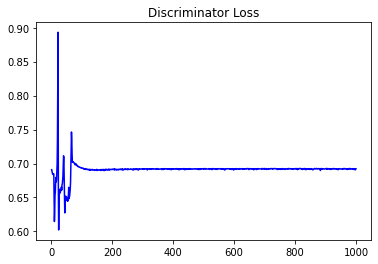

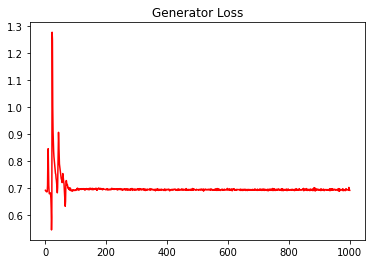

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.057255164929918036


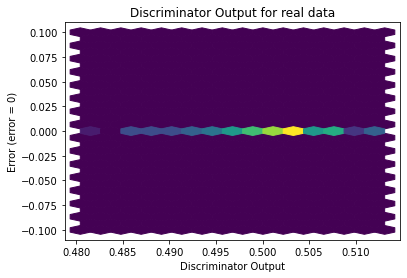

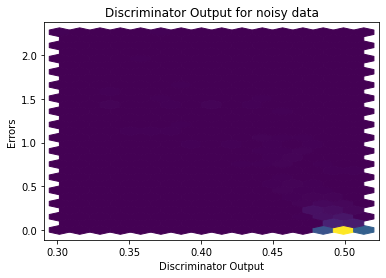

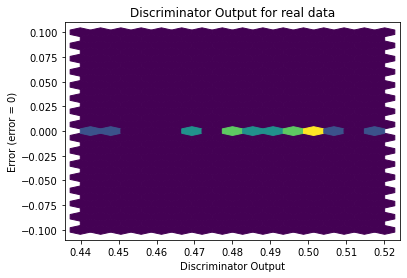

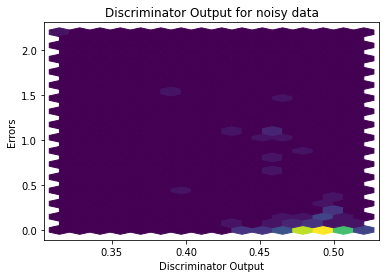

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


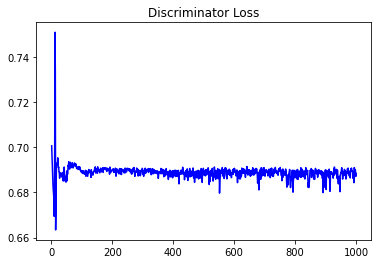

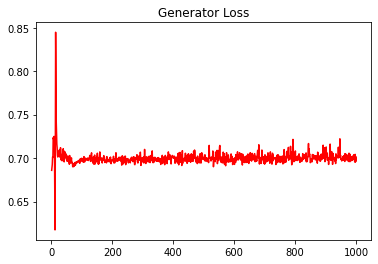

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.049063334780493975


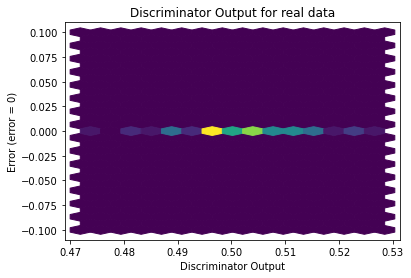

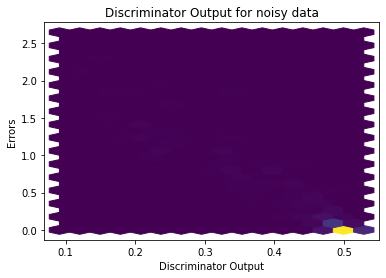

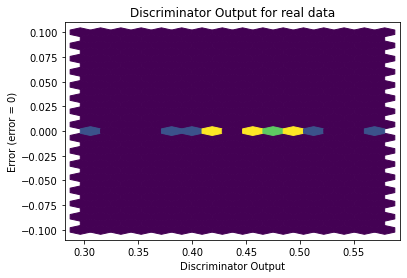

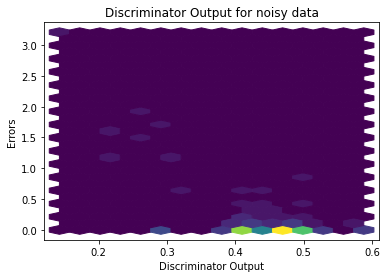

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3126]], requires_grad=True)
